# Hypothesis Testing

Section: c. Store Sales Cannibalization by alternative distribution channels

**Part of:** [marketing_campaign_082825_working.ipynb](./marketing_campaign_082825_working.ipynb)

In [1]:
# Setup and data loading
from utils import (
    ProjectConfig,
    load_intermediate_results,
    save_project_figure,
    reset_plot_settings,
)
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

config = ProjectConfig()
# Load data from previous notebook
df = load_intermediate_results("data_from_08_step_6.pkl", config)

## c. Store Sales Cannibalization by alternative distribution channels

In [2]:
# c. Store sales cannibalization

# Specify H₀ and H₁:
# H₀: The distributions of In-Store Purchases versus all the other Purchase Methods are
#     identical (no difference in distribution).
# H₁: The distribution of In-Store Purchass versus the other Purchase Methods is
#     stochastically less (In-store purchase tends to be less than other purchase methods).

# Normality and Test Choice:
# •  Use the t-test if the data from the 3 purchase groups is approximately normally distributed.
# •  Use the Mann-Whitney U test if the data is non-normal.

#### Correlation Test Choices
# Pearson:
# •  Assumes linear relationships
# •  Sensitive to outliers and skewness
# •  Underestimates relationships in your data
# Spearman:
# •  Works with monotonic relationships
# •  Robust to outliers
# •  Better captures the true strength of relationships in your skewed data


In [3]:
# Extract relevant columns
store_purchases = df['NumStorePurchases']
catalog_purchases = df['NumCatalogPurchases']
web_purchases = df['NumWebPurchases']
total_purchases = df['Total_Purchases']
alternate_purchases = df['NumWebPurchases'] + df['NumCatalogPurchases']

In [4]:
cols = ["NumStorePurchases", "NumWebPurchases", "NumCatalogPurchases", "Total_Purchases"]
df_cann = df[cols].dropna().reset_index(drop=True)

In [5]:
# Descriptive Statistics
print("Descriptive Statistics:")
print(round(df_cann.describe(),2))

Descriptive Statistics:
       NumStorePurchases  NumWebPurchases  NumCatalogPurchases  \
count            2229.00          2229.00              2229.00   
mean                5.81             4.10                 2.64   
std                 3.24             2.78                 2.80   
min                 0.00             0.00                 0.00   
25%                 3.00             2.00                 0.00   
50%                 5.00             4.00                 2.00   
75%                 8.00             6.00                 4.00   
max                13.00            27.00                28.00   

       Total_Purchases  
count          2229.00  
mean             12.55  
std               7.18  
min               0.00  
25%               6.00  
50%              12.00  
75%              18.00  
max              32.00  


Saved: figures\Purchase_Channel_Distributions.png


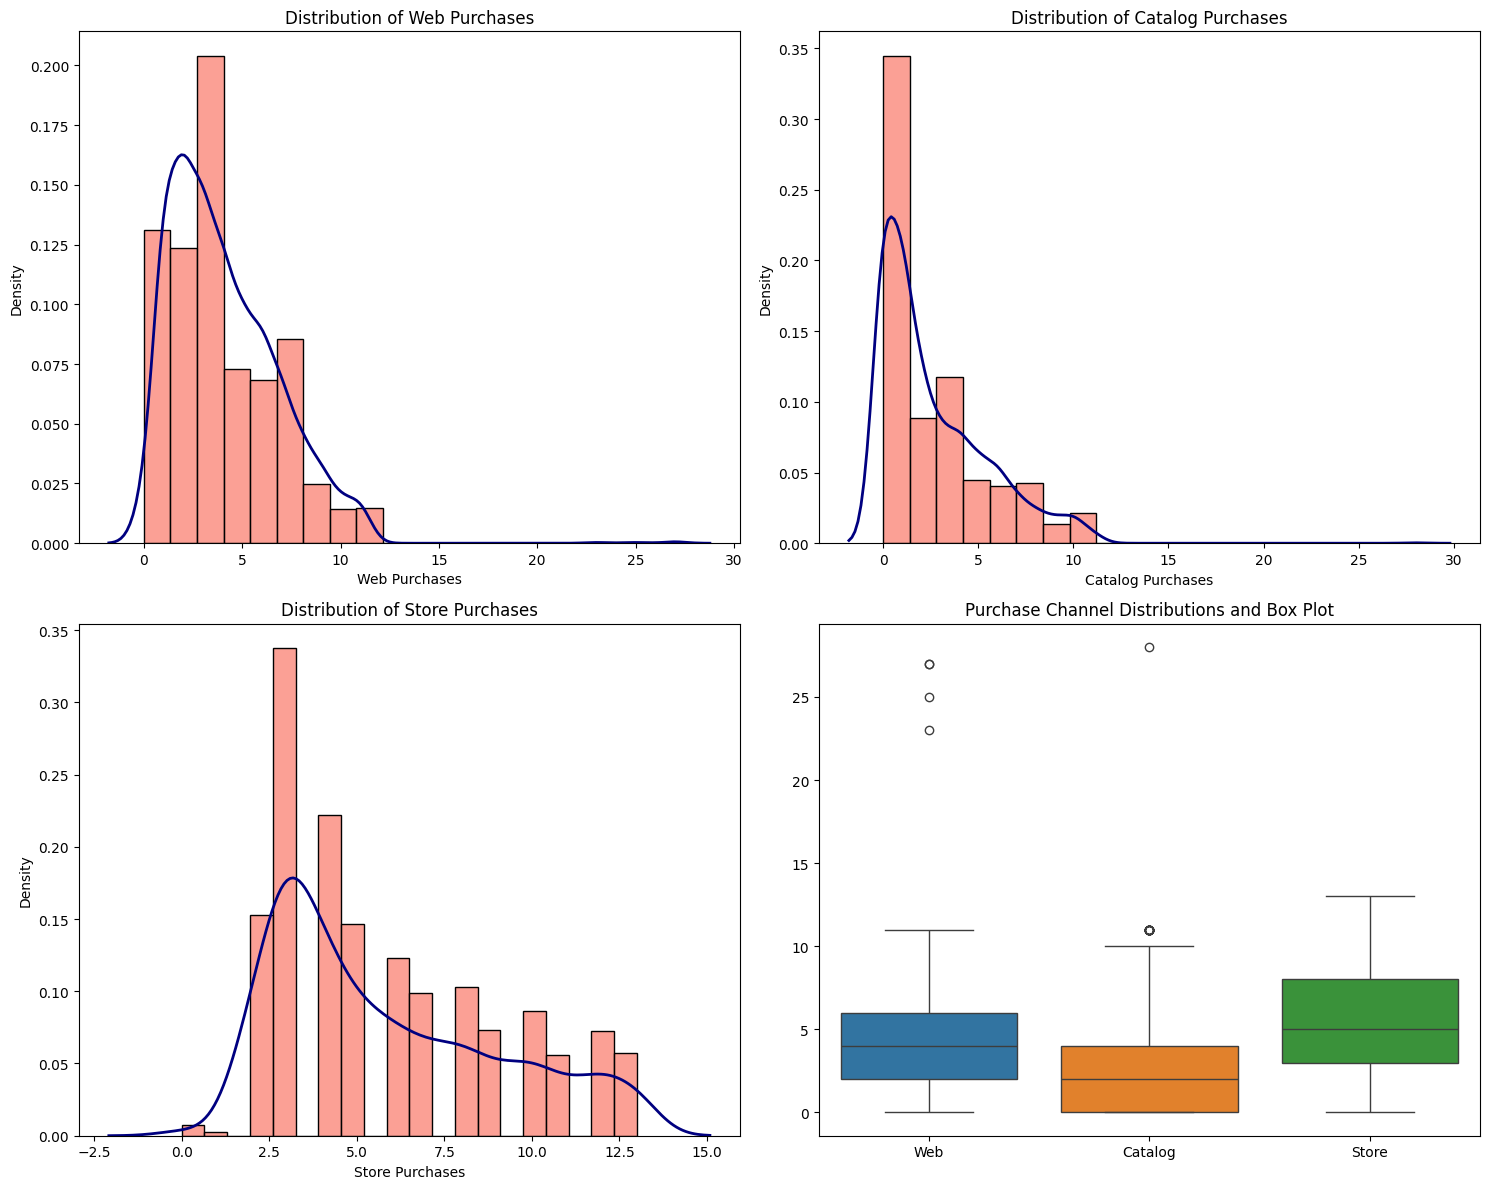

Summary Statistics by Channel:
                      count      mean       std  min  25%  50%  75%   max
NumWebPurchases      2229.0  4.100045  2.775461  0.0  2.0  4.0  6.0  27.0
NumCatalogPurchases  2229.0  2.636608  2.796161  0.0  0.0  2.0  4.0  28.0
NumStorePurchases    2229.0  5.812472  3.242144  0.0  3.0  5.0  8.0  13.0


In [6]:
# Create subplots for distribution analysis
reset_plot_settings()
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Distribution of each purchase channel
channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
channel_labels = ['Web Purchases', 'Catalog Purchases', 'Store Purchases']

for i, (channel, label) in enumerate(zip(channels, channel_labels)):
    row = i // 2
    col = i % 2

    # Histogram with KDE overlay
    sns.histplot(data=df, x=channel, kde=False, ax=axes[row, col], bins=20, color='salmon', stat='density')
    sns.kdeplot(data=df, x=channel, ax=axes[row, col], color='navy', linewidth=2)
    axes[row, col].set_title(f'Distribution of {label}')
    axes[row, col].set_xlabel(label)

# Box plot comparison
sns.boxplot(data=df[channels], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot Comparison of Purchase Channels')
axes[1, 1].set_xticklabels(['Web', 'Catalog', 'Store'])

plt.tight_layout()
save_project_figure(
    "Purchase_Channel_Distributions",
    "Purchase Channel Distributions and Box Plot",
    config,
)
plt.show()

# Summary statistics
print("Summary Statistics by Channel:")
summary_stats = df[channels].describe().T
print(summary_stats)

# Results
# Purchase data is highly right skewed. Suggests that non-parametric hypothesis testing should be used


Detailed Correlation Analysis:

NumWebPurchases vs NumCatalogPurchases:
   Pearson r=0.411, p=0.0000
   Spearman r=0.624, p=0.0000


Saved: figures\NumWebPurchases_vs_NumCatalogPurchases.png


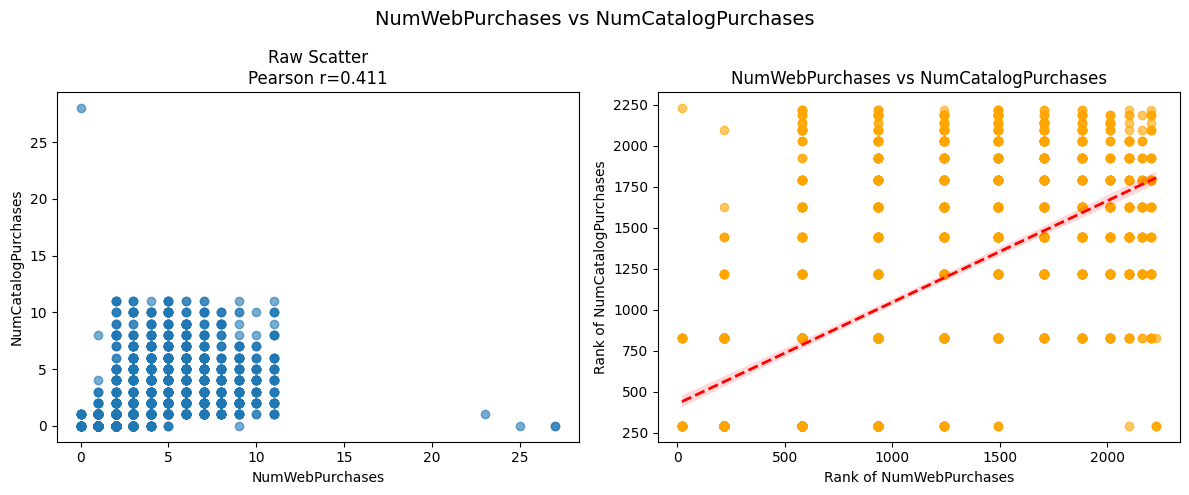


NumWebPurchases vs NumStorePurchases:
   Pearson r=0.499, p=0.0000
   Spearman r=0.669, p=0.0000


Saved: figures\NumWebPurchases_vs_NumStorePurchases.png


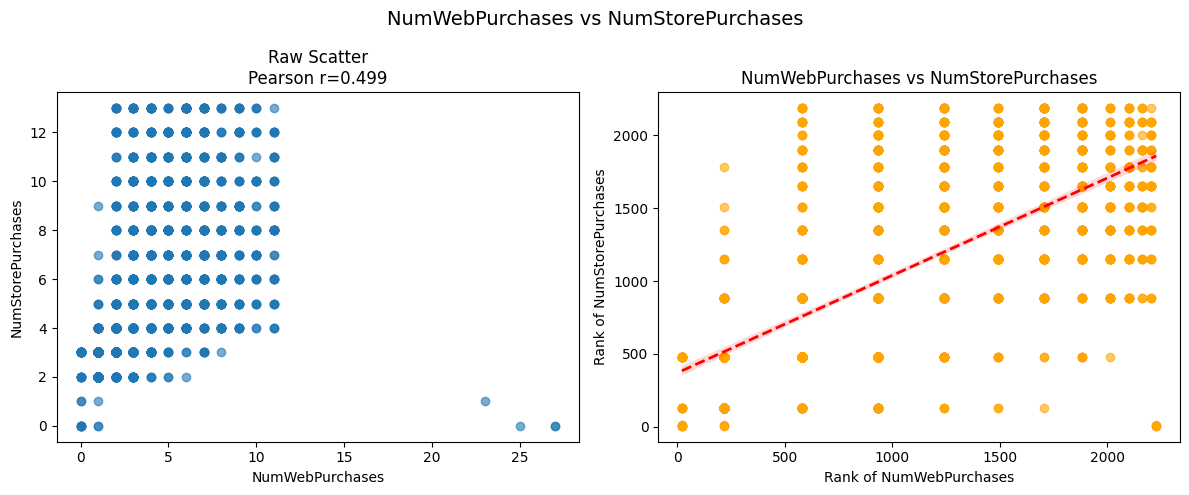


NumCatalogPurchases vs NumStorePurchases:
   Pearson r=0.562, p=0.0000
   Spearman r=0.715, p=0.0000


Saved: figures\NumCatalogPurchases_vs_NumStorePurchases.png


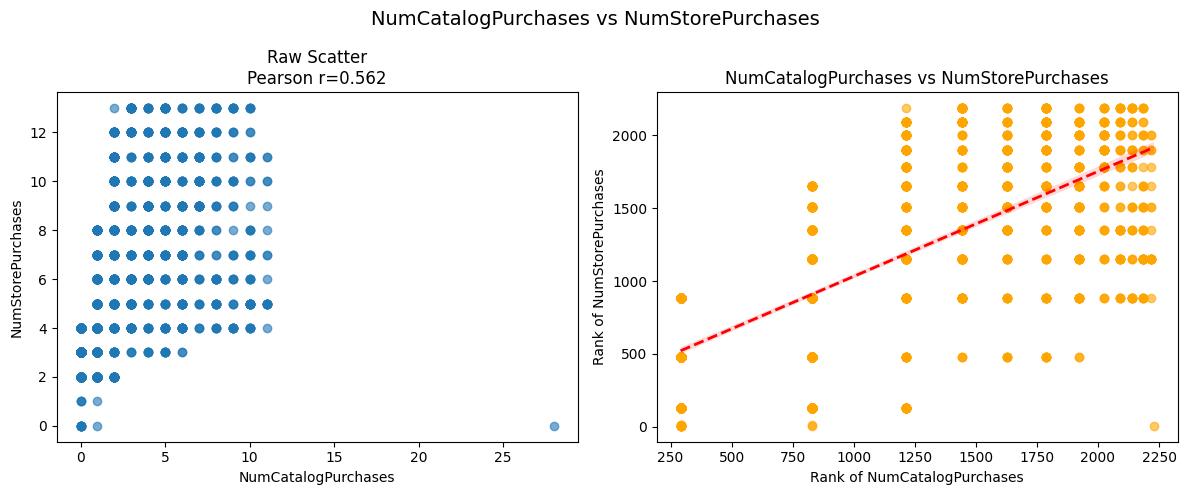

In [7]:
# Correlation matrix for purchase channels
reset_plot_settings()

# Calculate correlation matrix
corr_matrix = df[channels].corr(method='spearman')

# Create a new dataframe for the analysis
df_corr = df.copy()
# Create a new channel which is the sum of non-store purchases
df_corr['AlternativeChannelPurchases'] = df_corr['NumWebPurchases'] + df_corr['NumCatalogPurchases']

# Print correlation coefficients with p-values
channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
print("\nDetailed Correlation Analysis:")


for i in range(len(channels)):
    for j in range(i+1, len(channels)):
        x = df_corr[channels[i]]
        y = df_corr[channels[j]]

        # Pearson correlation
        p_corr, p_value = pearsonr(x, y)

        # Spearman correlation
        s_corr, s_value = spearmanr(x, y)

        print(f"\n{channels[i]} vs {channels[j]}:")
        print(f"   Pearson r={p_corr:.3f}, p={p_value:.4f}")
        print(f"   Spearman r={s_corr:.3f}, p={s_value:.4f}")

        # ---- PLOTS ----
        reset_plot_settings()
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Scatter plot (raw)
        axes[0].scatter(x, y, alpha=0.6)
        axes[0].set_xlabel(channels[i])
        axes[0].set_ylabel(channels[j])
        axes[0].set_title(f"Raw Scatter\nPearson r={p_corr:.3f}")

        # Scatter plot (ranked)
        rank_x = x.rank()
        rank_y = y.rank()
        sns.regplot(x=rank_x, y=rank_y,
                    ax=axes[1],
                    scatter_kws={'alpha': 0.6},
                    color="orange",
                    line_kws={'color':'red', 'linestyle':'--', 'linewidth':2})
        #axes[1].scatter(rank_x, rank_y, alpha=0.6, color="orange")
        axes[1].set_xlabel(f"Rank of {channels[i]}")
        axes[1].set_ylabel(f"Rank of {channels[j]}")
        axes[1].set_title(f"Ranked Scatter\nSpearman r={s_corr:.3f}")

        plt.suptitle(f"{channels[i]} vs {channels[j]}", fontsize=14)
        plt.tight_layout()
        save_project_figure(
            f"{channels[i]}_vs_{channels[j]}",
            f"{channels[i]} vs {channels[j]}",
            config,
        )
        plt.show()

In [8]:
# Spearman vs Pearson:
# Spearman is better for this analysis for several reasons:
# 1. Consistently Higher Values: Spearman correlations are substantially higher across all comparisons (0.62-0.72 vs 0.41-0.56),
#    suggesting the relationships are stronger than Pearson indicates.
# 2. Non-linear Relationships: The raw scatter plots show clear evidence of non-linearity - clustered, stepped patterns rather
#    than smooth linear trends. This is particularly evident in the catalog vs store plot.
# 3. Outliers and Skewness: The scatter plots reveal outliers and skewed distributions that can suppress Pearson
#    correlations but don’t affect Spearman.
# 4. Count Data Characteristics: Purchase counts often follow non-normal distributions making rank-based correlation
#    more appropriate.
# The ranked scatter plots on the right show much cleaner, more linear relationships, confirming that Spearman better
# captures the true strength of association between these purchase behaviors.

# Use Spearman correlation for customer behavior analysis, as it provides a more accurate picture of the monotonic
# relationships between different purchase channels.​​​​​​​​​​​​​​​​

Saved: figures\Comprehensive_Scatter_Plot_Analysis_for_Purchase_Channels.png


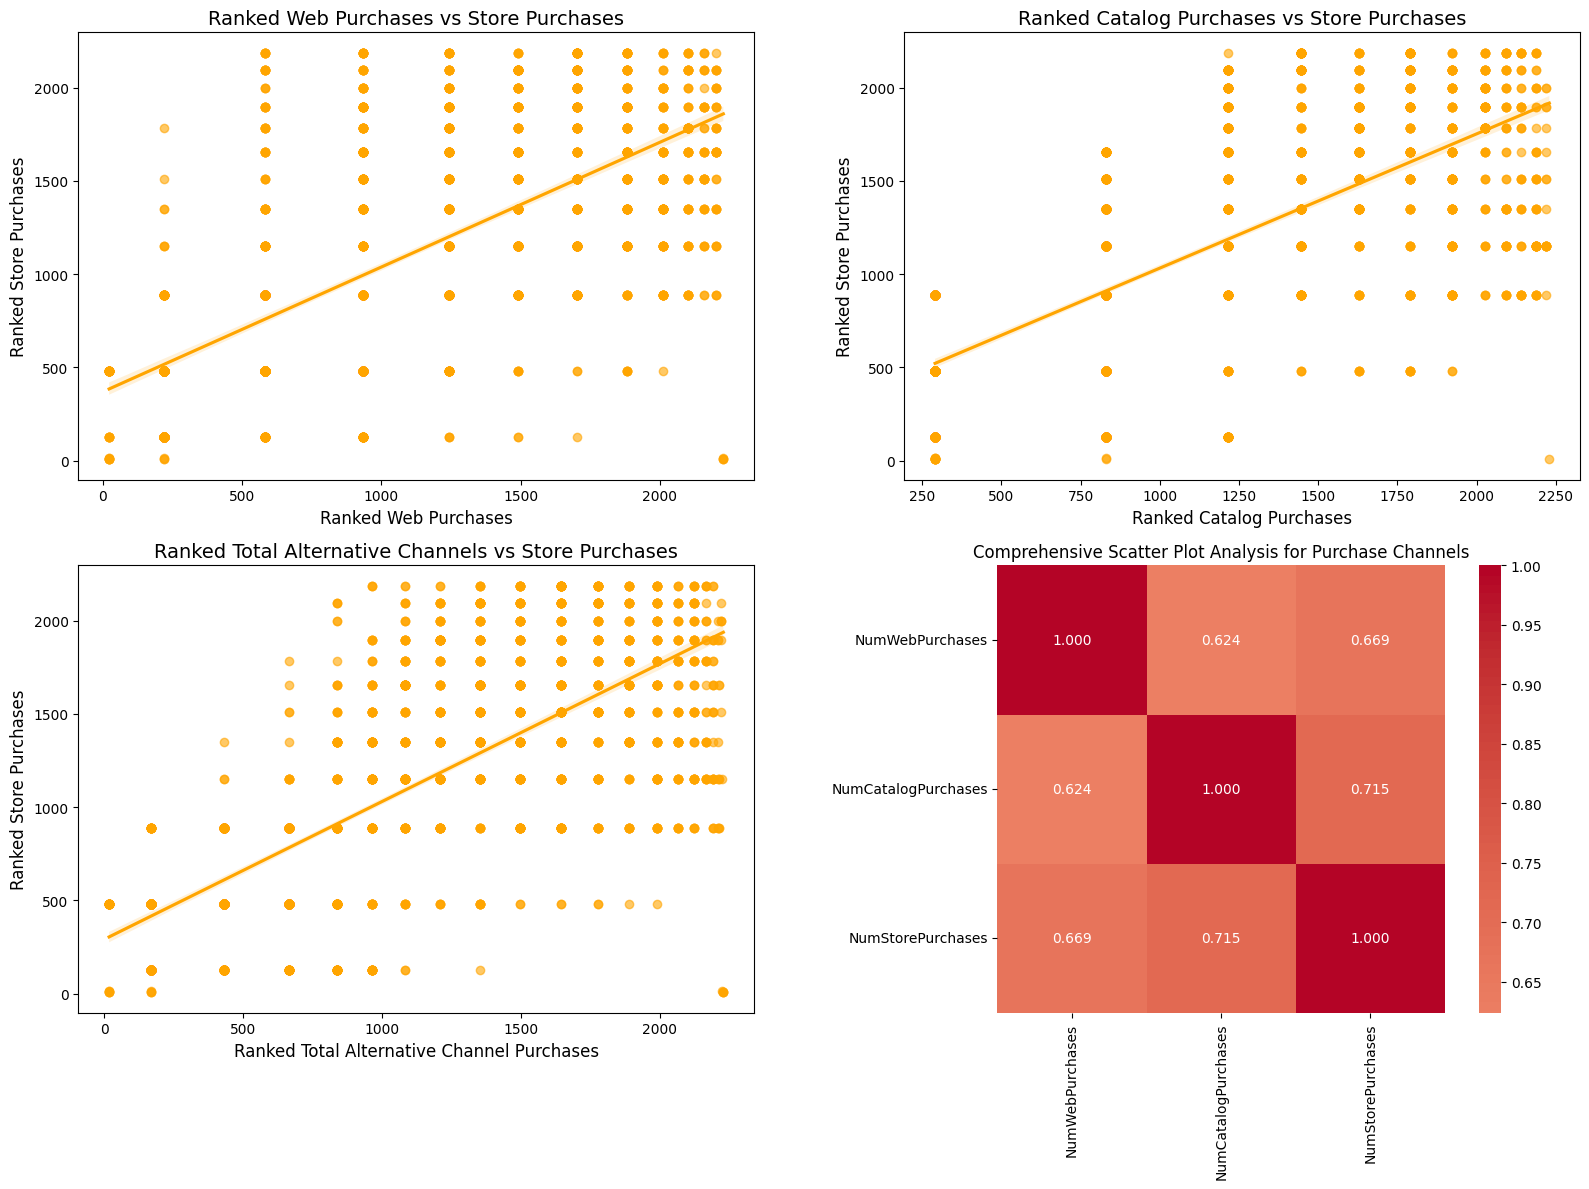

In [9]:
# Create comprehensive scatter plot analysis
reset_plot_settings()
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

df_corr['RankedWebPurchases'] = df_corr['NumWebPurchases'].rank()
df_corr['RankedCatalogPurchases'] = df_corr['NumCatalogPurchases'].rank()
df_corr['RankedStorePurchases'] = df_corr['NumStorePurchases'].rank()
df_corr['RankedAlternativeChannelPurchases'] = df_corr['AlternativeChannelPurchases'].rank()

# Web vs Store
sns.regplot(data=df_corr, x='RankedWebPurchases', y='RankedStorePurchases',
            ax=axes[0, 0], scatter_kws={'alpha': 0.6}, color="orange")
axes[0, 0].set_title('Ranked Web Purchases vs Store Purchases', fontsize=14)
axes[0, 0].set_xlabel('Ranked Web Purchases', fontsize=12)
axes[0, 0].set_ylabel('Ranked Store Purchases', fontsize=12)

# Catalog vs Store
sns.regplot(data=df_corr, x='RankedCatalogPurchases', y='RankedStorePurchases',
            ax=axes[0, 1], scatter_kws={'alpha': 0.6}, color="orange")
axes[0, 1].set_title('Ranked Catalog Purchases vs Store Purchases', fontsize=14)
axes[0, 1].set_xlabel('Ranked Catalog Purchases', fontsize=12)
axes[0, 1].set_ylabel('Ranked Store Purchases', fontsize=12)

# Alternative Combined vs Store
sns.regplot(data=df_corr, x='RankedAlternativeChannelPurchases', y='RankedStorePurchases',
            ax=axes[1, 0], scatter_kws={'alpha': 0.6}, color="orange")
axes[1, 0].set_title('Ranked Total Alternative Channels vs Store Purchases', fontsize=14)
axes[1, 0].set_xlabel('Ranked Total Alternative Channel Purchases', fontsize=12)
axes[1, 0].set_ylabel('Ranked Store Purchases', fontsize=12)

# Create heatmap with Spearman Correlation results
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, ax=axes[1,1], fmt='.3f')
axes[1, 1].set_title('Spearman Correlation Matrix: Purchase Channels', fontsize=14)

plt.tight_layout()
save_project_figure(
    "Comprehensive_Scatter_Plot_Analysis_for_Purchase_Channels",
    "Comprehensive Scatter Plot Analysis for Purchase Channels",
    config,
)
plt.show()

In [10]:
# Results
# Correlation shows positive relationships between the various purchase methods
# Strongest Relationship:
# Catalog and store purchases show the highest correlation (Pearson r=0.56, Spearman r=0.72), suggesting customers
# who buy from catalogs are also likely to shop in stores.

# Moderate Relationships:
# • Web and store purchases (Pearson r=0.50, Spearman r=0.67)
# • Web and catalog purchases (Pearson r=0.41, Spearman r=0.62)

# Results suggests customers tend to be multi-channel shoppers rather than exclusively using one purchase method.
# The moderate-to-strong correlations indicate complementary rather than competing channels.

In [11]:
# Normality check
from scipy.stats import shapiro

# Purpose:
# •  Tests the null hypothesis (H₀) that the data from the groups is normally distributed.
# •  Alternative hypothesis (H₁): The data is not normally distributed.

for group, name in zip([store_purchases, web_purchases, catalog_purchases, alternate_purchases],['NumStorePurchases','NumWebPurchases','NumCatalogPurchases','AlternatePurchase']):
    stat, p = shapiro(group)
    print(f"Shapiro-Wilk Test for {name}: W= {stat:.4f}, p-value = {p:.4f}")
    if p < 0.05:
        print("p-value < 0.05: Reject H₀, data is not normally distributed.")
    else:
        print("p-value >= 0.05: Fail to reject H₀, data may be normally distributed.")

# Use Mann-Whitney U test since it’s the direct non-parametric equivalent of the t-test

Shapiro-Wilk Test for NumStorePurchases: W= 0.9020, p-value = 0.0000
p-value < 0.05: Reject H₀, data is not normally distributed.
Shapiro-Wilk Test for NumWebPurchases: W= 0.8970, p-value = 0.0000
p-value < 0.05: Reject H₀, data is not normally distributed.
Shapiro-Wilk Test for NumCatalogPurchases: W= 0.8417, p-value = 0.0000
p-value < 0.05: Reject H₀, data is not normally distributed.
Shapiro-Wilk Test for AlternatePurchase: W= 0.9383, p-value = 0.0000
p-value < 0.05: Reject H₀, data is not normally distributed.


In [12]:
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

In [13]:
# Hypothesis tests:
# Test if web/catalog purchases negatively correlate with store purchases
# Cannibalization requires store purchases to decrease when others increase
# H0: High alternative channel users buy same/more in stores
# H1: High alternative channel users buy LESS in stores (cannibalization)

# high_web users equates to => df['NumWebPurchases'] > df['NumWebPurchases'].median()
# high_catalog users equates to => df['NumCatalogPurchases'] > df['NumCatalogPurchases'].median()

In [14]:
# Cannibalization looking at the medians:
high_web = df_corr[df_corr['NumWebPurchases'] > df_corr['NumWebPurchases'].median()]
low_web = df_corr[df_corr['NumWebPurchases'] <= df_corr['NumWebPurchases'].median()]

high_catalog = df[df['NumCatalogPurchases'] > df['NumCatalogPurchases'].median()]
low_catalog = df[df['NumCatalogPurchases'] <= df['NumCatalogPurchases'].median()]

print("Web Cannibalization Test:")
print(f"High web users - median store purchases: {high_web['NumStorePurchases'].median()}")
print(f"Low web users - median store purchases: {low_web['NumStorePurchases'].median()}")

print("\nCatalog Cannibalization Test:")
print(f"High catalog users - median store purchases: {high_catalog['NumStorePurchases'].median()}")
print(f"Low catalog users - median store purchases: {low_catalog['NumStorePurchases'].median()}")

Web Cannibalization Test:
High web users - median store purchases: 7.0
Low web users - median store purchases: 3.0

Catalog Cannibalization Test:
High catalog users - median store purchases: 8.0
Low catalog users - median store purchases: 3.0


In [15]:
def cannibalization_analysis_with_adjustment(df):
    """Complete cannibalization analysis with multiple comparison correction"""

    # What Each Column Represents:
    # - Original_p: Raw p-values from Mann-Whitney tests (no correction)
    # - Bonferroni_p: Traditional Bonferroni correction (p × number_of_tests)
    # - Holm_p: Holm-Bonferroni correction (sequential method)
    # - FDR_p: False Discovery Rate correction (Benjamini-Hochberg)

    # Why You're Comparing All Methods: Different Conservative Levels:_
    # - Most Conservative: Traditional Bonferroni
    # - Moderate: Holm-Bonferroni
    # - Least Conservative: FDR (Benjamini-Hochberg)

    tests = {}
    p_values = []
    test_names = []

    # Test 1: Web cannibalization
    high_web = df[df['NumWebPurchases'] > df['NumWebPurchases'].median()]
    low_web = df[df['NumWebPurchases'] <= df['NumWebPurchases'].median()]
    stat1, p1 = mannwhitneyu(high_web['NumStorePurchases'],
                            low_web['NumStorePurchases'],
                            alternative='less')

    tests['web_cannibalization'] = {
        'statistic': stat1,
        'p_value': p1,
        'high_median': high_web['NumStorePurchases'].median(),
        'low_median': low_web['NumStorePurchases'].median()
    }
    p_values.append(p1)
    test_names.append('Web Cannibalization')

    # Test 2: Catalog cannibalization
    high_catalog = df[df['NumCatalogPurchases'] > df['NumCatalogPurchases'].median()]
    low_catalog = df[df['NumCatalogPurchases'] <= df['NumCatalogPurchases'].median()]
    stat2, p2 = mannwhitneyu(high_catalog['NumStorePurchases'],
                            low_catalog['NumStorePurchases'],
                            alternative='less')

    tests['catalog_cannibalization'] = {
        'statistic': stat2,
        'p_value': p2,
        'high_median': high_catalog['NumStorePurchases'].median(),
        'low_median': low_catalog['NumStorePurchases'].median()
    }
    p_values.append(p2)
    test_names.append('Catalog Cannibalization')

    # Multiple comparison adjustments
    bonferroni = [min(p * len(p_values), 1.0) for p in p_values]
    _, holm_adj, _, _ = multipletests(p_values, method='holm')
    _, fdr_adj, _, _ = multipletests(p_values, method='fdr_bh')

    # Results summary
    import pandas as pd
    results_df = pd.DataFrame({
        'Test': test_names,
        'Original_p': p_values,
        'Bonferroni_p': bonferroni,
        'Holm_p': holm_adj,
        'FDR_p': fdr_adj,
        'Significant_Original': [p < 0.05 for p in p_values],
        'Significant_Bonferroni': [p < 0.05 for p in bonferroni],
        'Significant_Holm': [p < 0.05 for p in holm_adj],
        'Significant_FDR': [p < 0.05 for p in fdr_adj]
    })

    # What do the results mean?
    # - Significant = False means "Fail to reject the null hypothesis"
    # - Significant = True means "Reject the null hypothesis"

    return tests, results_df

In [16]:
# Run the analysis
tests, results = cannibalization_analysis_with_adjustment(df)
print(results)

                      Test  Original_p  Bonferroni_p  Holm_p  FDR_p  \
0      Web Cannibalization         1.0           1.0     1.0    1.0   
1  Catalog Cannibalization         1.0           1.0     1.0    1.0   

   Significant_Original  Significant_Bonferroni  Significant_Holm  \
0                 False                   False             False   
1                 False                   False             False   

   Significant_FDR  
0            False  
1            False  

In [17]:
# What do the results mean?
# Significant = False means "Fail to reject the null hypothesis"
# The data completely contradicts the cannibalization hypothesis. P Value can't be larger than 1.0

# Multiple Comparison Results:
# All adjustment methods (Bonferroni, Holm-Bonferroni, FDR) gave identical results, confirming that:
# • Robust conclusion - findings hold under different statistical assumptions
# • No need to worry about multiple testing - results are so clear that correction doesn’t matter

# Conclusion
# Testing for cannibalization was performed using multiple statistical approaches with different levels
# of conservatism. Regardless of the correction method used (Bonferroni, Holm-Bonferroni, or FDR),
# no evidence of cannibalization (all p-values = 1.0), providing strong evidence that alternative channels
# complement rather than compete with store sales.

# Final Interpretation
# There is no statistical evidence that web or catalog purchases cannibalize store sales. In fact, customers
# who purchase heavily through alternative channels also tend to be heavy store shoppers, suggesting these
# channels work synergistically rather than competitively.

In [18]:

# Save results for next notebook
# save_intermediate_results(df_processed, 'processed_data.pkl', config)
# save_intermediate_results(analysis_results, 'analysis_results.pkl', config)
# print('✓ Results saved for next notebook')